In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Below shows what the values of key named data contains

In [16]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
np.array(digits['data']).shape

(1797, 64)

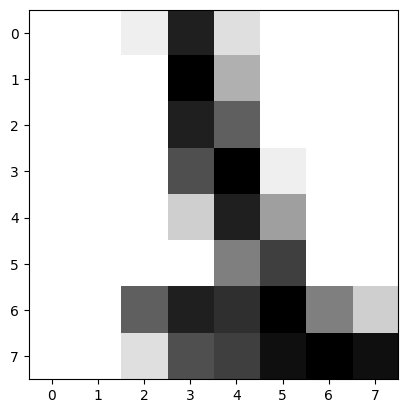

In [32]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r) #------> seems like number 1

If you see the shape of an image, it is represented as  8 x 8  matrix.

We use grayscale representation where an image pixel takes values in  [0,255] ; where  0  indicates pure black and  255  indicates pure white

In [23]:
digits.images.shape

(1797, 8, 8)

In [25]:
X = digits.data
Y = digits.target

In [27]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


Implementing PCA using sklearn's PCA method present in decomposition module.
Using PCA for mapping 64-dimensional digits data into 2-dimensional data. 
Using PCA model on to our data  𝑋(1797  x  64)  and this will calculate the top two eigen vectors will get computed ( 𝑢1 ,  𝑢2 )
transforming the data which basically does matrix multiplication of  𝑥𝑖 s with eigen vectors ( 𝑢1 ,  𝑢2 )

In [33]:
from sklearn import decomposition
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)

In [34]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

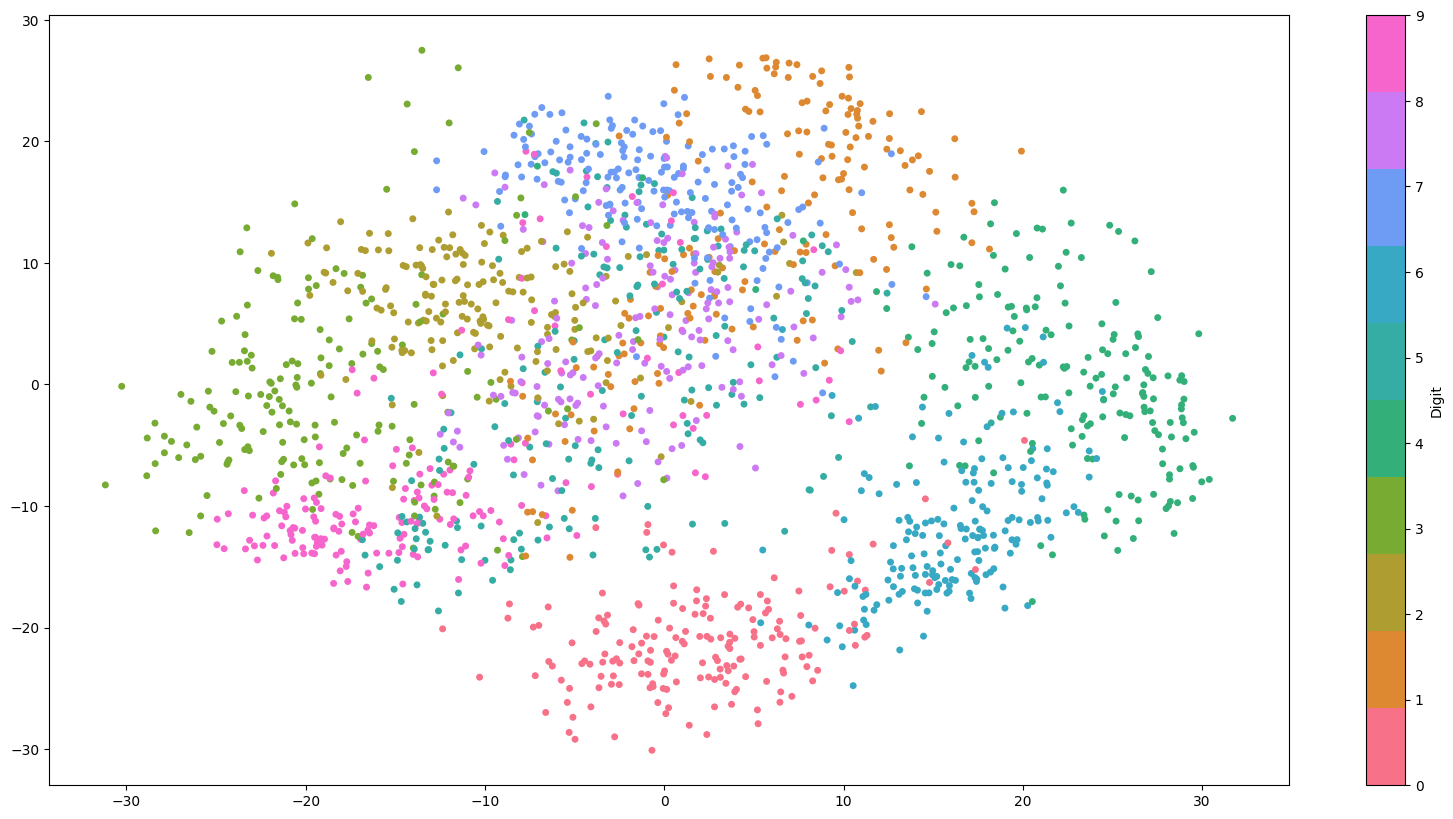

In [49]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,20)

"""
  on x-axis we use 0th dimension of z1
  on y-axis we use 1th dimension of z2
"""

im = ax.scatter(Z1[:,0], Z1[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [51]:
decomposition.PCA(n_components=2).fit(X).explained_variance_ratio_.sum()

array([0.14890594, 0.13618771])

In [62]:
for i in range(1, X.shape[1]):
    pca_nD = decomposition.PCA(n_components=i)
    pca_nD.fit(X)
    Zi = pca_nD.transform(X)
    print(f"If number of components selected is ", i, "then the PC array and variance captured is:")
    print("The PCA components array is : ",decomposition.PCA(n_components=i).fit(X).explained_variance_ratio_)
    print("The total variance captured by the principal components is : ", decomposition.PCA(n_components=i).fit(X).explained_variance_ratio_.sum()*100 ,"%")

If number of components selected is  1 then the PC array and variance captured is:
The PCA components array is :  [0.14890594]
The total variance captured by the principal components is :  14.890593584063854 %
If number of components selected is  2 then the PC array and variance captured is:
The PCA components array is :  [0.14890594 0.13618771]
The total variance captured by the principal components is :  28.5093648236993 %
If number of components selected is  3 then the PC array and variance captured is:
The PCA components array is :  [0.14890594 0.13618771 0.11794594]
The total variance captured by the principal components is :  40.30395858767509 %
If number of components selected is  4 then the PC array and variance captured is:
The PCA components array is :  [0.14890594 0.13618771 0.11794594 0.08409979]
The total variance captured by the principal components is :  48.71393800868427 %
If number of components selected is  5 then the PC array and variance captured is:
The PCA compone